In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv('C:/Users/柠檬有点萌/Desktop/machine_learning/wine.data', header=None)

In [2]:
#按7：3分裂成独立的训练集和测试集
from sklearn.model_selection import train_test_split
X, Y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)
#标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
#利用cov函数计算标准化训练数据的协方差矩阵
cov_mat = np.cov(X_train_std.T)
#特征值分解，产生含13个特征值的向量和13x13特征向量
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n Eigenvalues \n%s' % eigen_vals)
print(eigen_vecs)


 Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.108

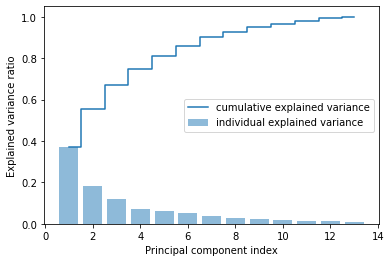

In [4]:
#画出特征值的方差解释比，用于收集信息最丰富的特征向量

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
#计算出解释方差和
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [10]:
#构建（特征值，特征向量）的元组列表
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
#将元组降序排列
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
#创建13x2维的投影矩阵W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


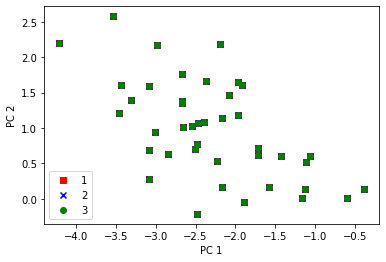

In [15]:
X_train_pca = X_train_std.dot(w)

colors = ['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca[Y_train==1, 0], X_train_pca[Y_train==1, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [12]:
#scikit-learn的主成分分析

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,Y,classifier,resolution=0.02):
    #定义颜色和标记，创建色度图
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    #画出目标界面
    x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1  #横坐标最大值和最小值
    x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1  #纵坐标最大值和最小值
    #绘制网格图，利用矩阵
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #ravel函数将矩阵变为一维数组
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #填充等高线
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(Y)):
        #X,Y均为矩阵，把点画出来
        plt.scatter(x=X[Y == cl,0] , y=X[Y == cl,1] , alpha = 0.8 , c = colors[idx] , marker = markers[idx] , label = cl , edgecolor = 'black')


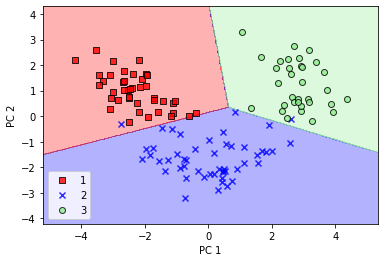

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, Y_train)
plot_decision_regions(X_train_pca, Y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

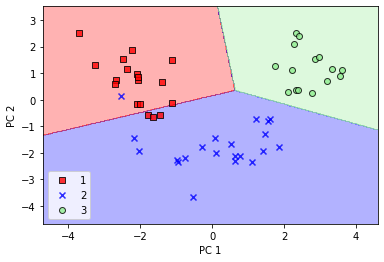

In [16]:
plot_decision_regions(X_test_pca, Y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()